In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RANDOM_STATE = 599

In [48]:
df = pd.read_csv('Data in Table S6 of the Supporting Information.csv')
data = df.values
X = data[:, :11]
Y = data[:, 11:]

print("Original Y shape:", Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=RANDOM_STATE)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Missing values in x_train:", np.isnan(x_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())

params = {
    'n_estimators': 6,
    'learning_rate': 0.4,
    'max_depth': 3,
    'min_samples_split': 2,
    'random_state': RANDOM_STATE
}

model = MultiOutputRegressor(GradientBoostingRegressor(**params))
model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f"Metrics train:\n\t MSR: {mean_squared_error(y_train, train_predictions):.4f} \n\t MAR: {mean_absolute_error(y_train, train_predictions):.4f} \n\t R2: {r2_score(y_train, train_predictions):.4f}")
print(f"Metrics test:\n\t MSR: {mean_squared_error(y_test, test_predictions):.4f} \n\t MAR: {mean_absolute_error(y_test, test_predictions):.4f} \n\t R2: {r2_score(y_test, test_predictions):.4f}")

Original Y shape: (35, 4)
Missing values in x_train: 0
Missing values in y_train: 0
Metrics train:
	 MSR: 0.0229 
	 MAR: 0.1223 
	 R2: 0.9807
Metrics test:
	 MSR: 0.1120 
	 MAR: 0.2402 
	 R2: 0.9035


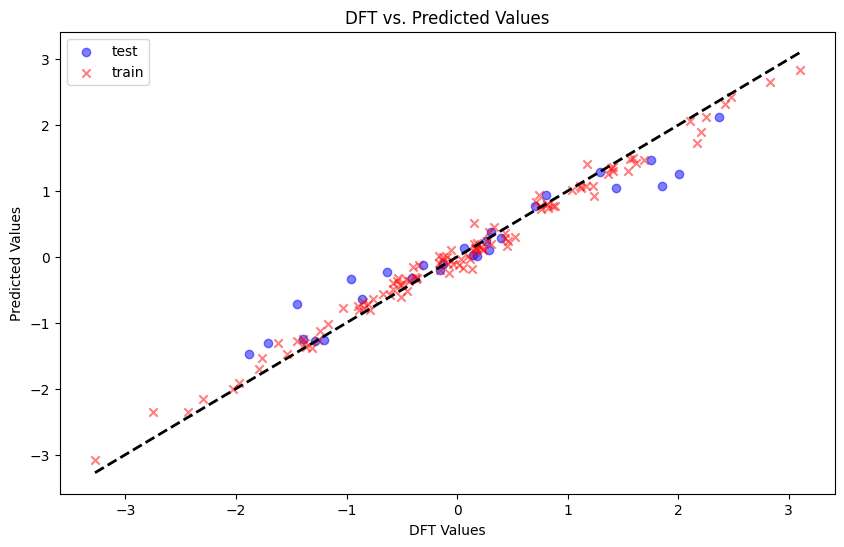

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')
plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

y_test:
0.1833992 -0.9639731 -0.8643401 1.855914
-1.1996728 0.3946019 0.7062999 0.309771
-0.3106448 -0.1273721 0.8037749 -0.154758
0.2616552 -1.3958221 1.7536669 -0.4085
0.2903862 -1.4525181 2.0043999 -0.631268
-1.8778668 2.3668659 -1.7131771 1.435178
0.1418092 0.0589219 -1.2819721 1.292241
test_predictions:
0.02086611378772909 -0.3369559436467491 -0.6422181699361602 1.079258092678796
-1.260523822888077 0.2914408420927437 0.7658573596077209 0.37112661961191673
-0.12718908121986103 -0.11484260283611941 0.9436876843469632 -0.19628123156119257
0.2382321342085587 -1.2443487164056826 1.4657261936753723 -0.31716189822785923
0.10330548448550687 -0.7119294672795871 1.2520971919688537 -0.228294420719389
-1.469505452644569 2.11690084994933 -1.3036855192052466 1.0519750094285665
0.03136045043700317 0.13252279786233392 -1.2805868853607147 1.2937206725573842
y_train:
-1.5354418 2.2511439 -1.6232791 1.118577
0.2691722 -1.3912971 1.6930709 -0.359946
-1.3088428 0.3318529 0.0141299 1.17386
-0.0849068 0

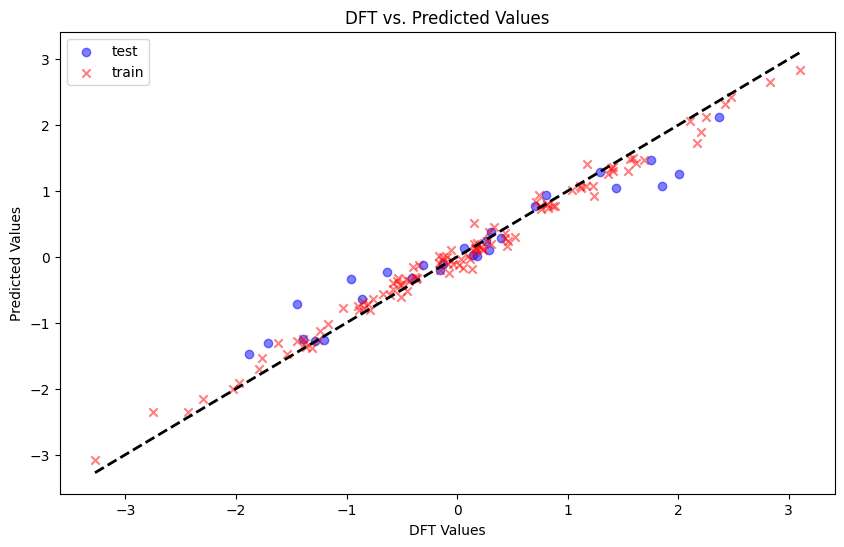

In [50]:
def print_no_brackets(array):
    for item in array:
        print(' '.join(map(str, item)))

print("y_test:")
print_no_brackets(y_test)

print("test_predictions:")
print_no_brackets(test_predictions)

print("y_train:")
print_no_brackets(y_train)

print("train_predictions:")
print_no_brackets(train_predictions)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')

plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()